In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Week4_Hack.xlsx')
df.head()

,Days,M1,T1,W1,TH1,F1,M2,T2,W2,TH2,F2,M3,T3,W3,TH3,F3,M4,T4,W4,TH4,F4
0,1,4,5,5,6,7,1,2,3,4,5,3,4,5,6,7,4.0,5.0,6.0,7.0,7.0
1,2,1,2,3,4,5,5,5,6,6,7,3,4,5,6,7,6.0,6.0,7.0,7.0,7.0
2,3,3,4,5,6,7,2,3,4,5,6,5,6,6,7,7,2.0,3.0,NaN,5.0,6.0
3,4,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,4.0,5.0,6.0,7.0,7.0
4,5,2,3,4,5,6,5,5,6,6,7,5,6,6,7,7,NaN,5.0,6.0,7.0,NaN


In [4]:
df1=df[['M4','T4','W4','TH4','F4']]

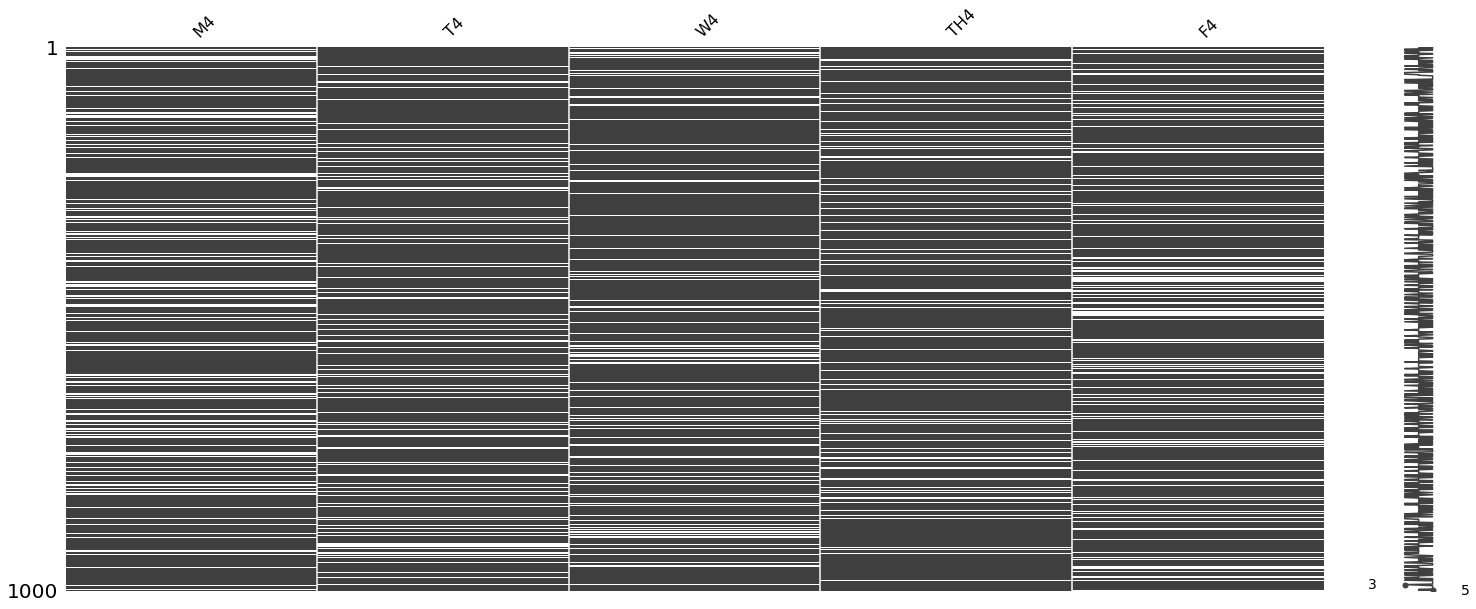

In [5]:
import missingno as msno 
  

  
# Visualize missing values as a matrix 
msno.matrix(df1)

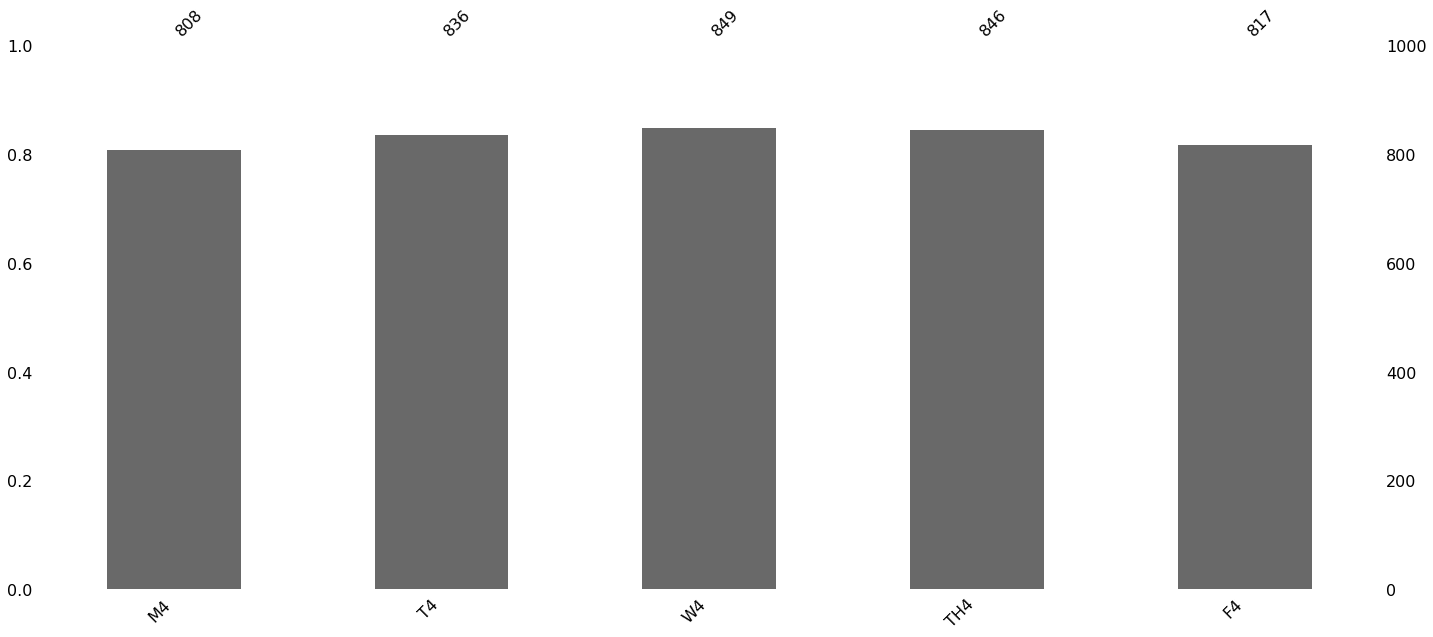

In [6]:
msno.bar(df1)

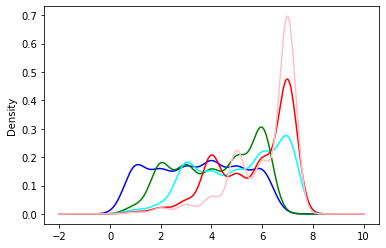

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M4'].plot(kind='kde', ax=ax, color='blue')
df['T4'].plot(kind='kde', ax=ax, color='green')
df['W4'].plot(kind='kde', ax=ax, color='cyan')
df['TH4'].plot(kind='kde', ax=ax, color='red')
df['F4'].plot(kind='kde', ax=ax, color='pink')

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mice = IterativeImputer(n_nearest_features=5)
df_mice=imp_mice.fit_transform(df1)
df_mice=pd.DataFrame(df_mice,columns=df1.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


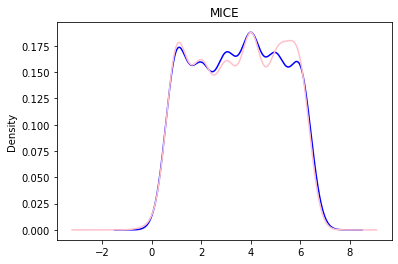

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M4'].plot(kind='kde', ax=ax, color='blue')
df_mice['M4'].plot(kind='kde', ax=ax, color='pink',title='MICE')

In [10]:
from sklearn.impute import KNNImputer
imp_KNN = KNNImputer(n_neighbors=5,weights='uniform')
df_KNN=imp_KNN.fit_transform(df1)
df_KNN=pd.DataFrame(df_KNN,columns=df1.columns)

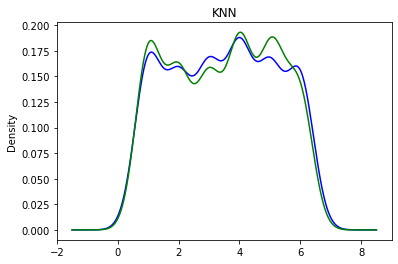

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['M4'].plot(kind='kde', ax=ax, color='blue')
df_KNN['M4'].plot(kind='kde', ax=ax, color='green',title='KNN')

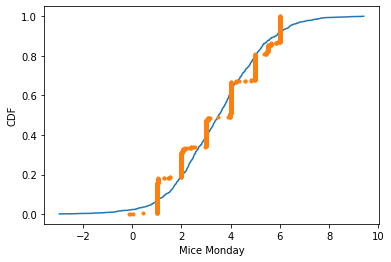

In [12]:
mu = np.mean(df_mice['M4'])
sigma = np.std(df_mice['M4'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal)
x, y = ecdf(df_mice['M4'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Monday')
_ = plt.ylabel('CDF')
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(df_mice[['M4']],samples_normal)

-1.0907896889232522

In [14]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
sample1 = samples_normal
sample2 = df_mice['M4']
sample = hstack((sample1, sample2))
# fit a cdf
Ecdf = ECDF(sample)
print('P(x<0): %.3f' % Ecdf(0))
print('P(x<1): %.3f' % Ecdf(1))
print('P(x<2): %.3f' % Ecdf(2))
print('P(x<3): %.3f' % Ecdf(3))
print('P(x<4): %.3f' % Ecdf(4))
print('P(x<5): %.3f' % Ecdf(5))
print('P(x<6): %.3f' % Ecdf(6))
print('P(x<7): %.3f' % Ecdf(7))
print('P(x<8): %.3f' % Ecdf(8))

P(x<0): 0.013
P(x<1): 0.106
P(x<2): 0.249
P(x<3): 0.434
P(x<4): 0.632
P(x<5): 0.801
P(x<6): 0.960
P(x<7): 0.986
P(x<8): 0.996


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


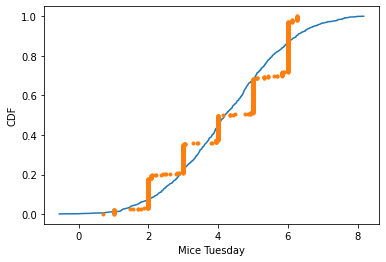

In [15]:
mu = np.mean(df_mice['T4'])
sigma = np.std(df_mice['T4'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal_Tuesday = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal_Tuesday)
x, y = ecdf(df_mice['T4'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Tuesday')
_ = plt.ylabel('CDF')
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(df_mice[['T4']],samples_normal_Tuesday)

-0.9020895875740356

In [17]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
sample1 = samples_normal_Tuesday
sample2 = df_mice['T4']
sample = hstack((sample1, sample2))
# fit a cdf
Ecdf = ECDF(sample)
print('P(x<0): %.3f' % Ecdf(0))
print('P(x<1): %.3f' % Ecdf(1))
print('P(x<2): %.3f' % Ecdf(2))
print('P(x<3): %.3f' % Ecdf(3))
print('P(x<4): %.3f' % Ecdf(4))
print('P(x<5): %.3f' % Ecdf(5))
print('P(x<6): %.3f' % Ecdf(6))
print('P(x<7): %.3f' % Ecdf(7))
print('P(x<8): %.3f' % Ecdf(8))

P(x<0): 0.001
P(x<1): 0.018
P(x<2): 0.126
P(x<3): 0.283
P(x<4): 0.472
P(x<5): 0.677
P(x<6): 0.919
P(x<7): 0.982
P(x<8): 0.999


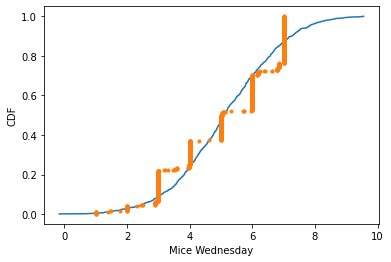

In [18]:
mu = np.mean(df_mice['W4'])
sigma = np.std(df_mice['W4'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal_Wednesday = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal_Wednesday)
x, y = ecdf(df_mice['W4'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Wednesday')
_ = plt.ylabel('CDF')
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2_score(df_mice[['W4']],samples_normal_Wednesday)

-0.9270882311583517

In [20]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
sample1 = samples_normal_Wednesday
sample2 = df_mice['W4']
sample = hstack((sample1, sample2))
# fit a cdf
Ecdf = ECDF(sample)
print('P(x<0): %.3f' % Ecdf(0))
print('P(x<1): %.3f' % Ecdf(1))
print('P(x<2): %.3f' % Ecdf(2))
print('P(x<3): %.3f' % Ecdf(3))
print('P(x<4): %.3f' % Ecdf(4))
print('P(x<5): %.3f' % Ecdf(5))
print('P(x<6): %.3f' % Ecdf(6))
print('P(x<7): %.3f' % Ecdf(7))
print('P(x<8): %.3f' % Ecdf(8))

P(x<0): 0.001
P(x<1): 0.008
P(x<2): 0.036
P(x<3): 0.153
P(x<4): 0.306
P(x<5): 0.480
P(x<6): 0.699
P(x<7): 0.933
P(x<8): 0.982


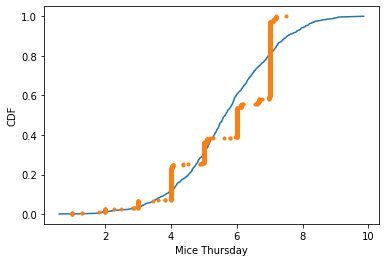

In [21]:
mu = np.mean(df_mice['TH4'])
sigma = np.std(df_mice['TH4'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal_Thursday = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal_Thursday)
x, y = ecdf(df_mice['TH4'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Thursday')
_ = plt.ylabel('CDF')
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(df_mice[['TH4']],samples_normal_Thursday)

-1.0674600613068717

In [23]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
sample1 = samples_normal_Thursday
sample2 = df_mice['TH4']
sample = hstack((sample1, sample2))
# fit a cdf
Ecdf = ECDF(sample)
print('P(x<0): %.3f' % Ecdf(0))
print('P(x<1): %.3f' % Ecdf(1))
print('P(x<2): %.3f' % Ecdf(2))
print('P(x<3): %.3f' % Ecdf(3))
print('P(x<4): %.3f' % Ecdf(4))
print('P(x<5): %.3f' % Ecdf(5))
print('P(x<6): %.3f' % Ecdf(6))
print('P(x<7): %.3f' % Ecdf(7))
print('P(x<8): %.3f' % Ecdf(8))

P(x<0): 0.000
P(x<1): 0.004
P(x<2): 0.019
P(x<3): 0.052
P(x<4): 0.176
P(x<5): 0.333
P(x<6): 0.570
P(x<7): 0.890
P(x<8): 0.971


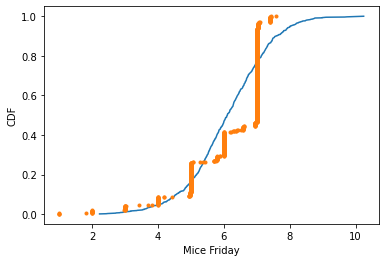

In [24]:
mu = np.mean(df_mice['F4'])
sigma = np.std(df_mice['F4'])

# Sample out of a normal distribution with this mu and sigma: samples
samples_normal_Friday = np.random.normal(mu, sigma, size=1000)

# Get the CDF of the samples and of the data
x_normal, y_normal = ecdf(samples_normal_Friday)
x, y = ecdf(df_mice['F4'])

# Plot the CDFs and show the plot
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Mice Friday')
_ = plt.ylabel('CDF')
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(df_mice[['F4']],samples_normal_Friday)

-0.9153143618167432

In [26]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
sample1 = samples_normal_Friday
sample2 = df_mice['F4']
sample = hstack((sample1, sample2))
# fit a cdf
Ecdf = ECDF(sample)
print('P(x<0): %.3f' % Ecdf(0))
print('P(x<1): %.3f' % Ecdf(1))
print('P(x<2): %.3f' % Ecdf(2))
print('P(x<3): %.3f' % Ecdf(3))
print('P(x<4): %.3f' % Ecdf(4))
print('P(x<5): %.3f' % Ecdf(5))
print('P(x<6): %.3f' % Ecdf(6))
print('P(x<7): %.3f' % Ecdf(7))
print('P(x<8): %.3f' % Ecdf(8))

P(x<0): 0.000
P(x<1): 0.002
P(x<2): 0.010
P(x<3): 0.027
P(x<4): 0.066
P(x<5): 0.211
P(x<6): 0.441
P(x<7): 0.853
P(x<8): 0.973


In [27]:
df_moments=df_mice[['M4','T4','W4','TH4','F4']]

In [28]:
df_moments=df_moments.round(0)

In [29]:
df_moments.to_excel('Week4_Moments.xlsx')

In [33]:
df_mon=pd.read_excel('Clus_mon.xlsx')
df_mon.head()

,M1,M2,M3,M4
0,4,1,3,4
1,1,5,3,6
2,3,2,5,2
3,1,1,1,4
4,2,5,5,4


In [34]:
from sklearn.decomposition import PCA

# Feature matrix and target array
X = df_mon

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.33987638 0.23092256]


In [35]:
Monday=pd.DataFrame(principalComponents)
Monday

,0,1
0,-0.229930,-2.030228
1,-2.768602,2.612639
2,1.799656,-0.688845
3,-0.395765,0.333614
4,-0.611620,1.867024
...,...,...
995,-1.966715,-1.142859
996,-1.581968,-1.866671
997,-1.531098,1.891918
998,0.994712,-0.106787


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(Monday)
    score = silhouette_score(Monday, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.40462100555228064)
For n_clusters = 3, silhouette score is 0.38121599805008954)
For n_clusters = 4, silhouette score is 0.36853478447635457)
For n_clusters = 5, silhouette score is 0.3662378396716737)
For n_clusters = 6, silhouette score is 0.37802710164222614)
For n_clusters = 7, silhouette score is 0.37435209926229074)
For n_clusters = 8, silhouette score is 0.38356168329463725)
For n_clusters = 9, silhouette score is 0.37471179598543347)


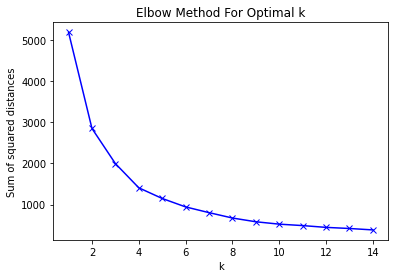

In [37]:
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Monday)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
kmeans_monday=KMeans(n_clusters=2, random_state=123)
kmeans_monday.fit(Monday)
pred_monday=kmeans_monday.predict(Monday)

In [39]:
df_mice['cluster_Monday']= pred_monday

In [40]:
df_Tuesday=[df['T1'],df['T2'],df['T3'],df_mice['T4']]
df_Tuesday=pd.DataFrame(df_Tuesday)
df_Tuesday=df_Tuesday.T
df_Tuesday

,T1,T2,T3,T4
0,5.0,2.0,4.0,5.0
1,2.0,5.0,4.0,6.0
2,4.0,3.0,6.0,3.0
3,2.0,2.0,2.0,5.0
4,3.0,5.0,6.0,5.0
...,...,...,...,...
995,3.0,2.0,6.0,6.0
996,5.0,2.0,1.0,5.0
997,1.0,4.0,4.0,5.0
998,1.0,1.0,6.0,3.0


In [41]:
from sklearn.decomposition import PCA

# Feature matrix and target array
X = df_Tuesday

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.32970264 0.26948937]


In [42]:
Tuesday=pd.DataFrame(principalComponents)
Tuesday

,0,1
0,-0.627943,-0.093893
1,-1.822608,-0.148194
2,1.494032,-1.855449
3,-0.682783,2.093987
4,-0.670841,-2.096584
...,...,...
995,-1.274640,-2.040843
996,-0.964382,2.879086
997,-0.655445,0.075320
998,1.916925,-1.544243


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(Tuesday)
    score = silhouette_score(Tuesday, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4026364888067825)
For n_clusters = 3, silhouette score is 0.4232872923488577)
For n_clusters = 4, silhouette score is 0.4268954617578872)
For n_clusters = 5, silhouette score is 0.4083741672958746)
For n_clusters = 6, silhouette score is 0.3936634597532194)
For n_clusters = 7, silhouette score is 0.40637235939752936)
For n_clusters = 8, silhouette score is 0.4192848224855193)
For n_clusters = 9, silhouette score is 0.42550877552113137)


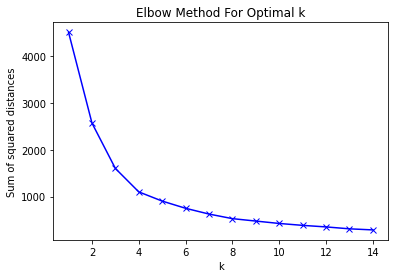

In [44]:
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Tuesday)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
kmeans_tuesday=KMeans(n_clusters=4, random_state=123)
kmeans_tuesday.fit(Tuesday)
pred_tuesday=kmeans_tuesday.predict(Tuesday)

In [46]:
df_mice['cluster_Tuesday']= pred_tuesday

In [47]:
df_Wednesday=[df['W1'],df['W2'],df['W3'],df_mice['W4']]
df_Wednesday=pd.DataFrame(df_Wednesday)
df_Wednesday=df_Wednesday.T
df_Wednesday

,W1,W2,W3,W4
0,5.0,3.0,5.0,6.000000
1,3.0,6.0,5.0,7.000000
2,5.0,4.0,6.0,3.970287
3,3.0,3.0,3.0,6.000000
4,4.0,6.0,6.0,6.000000
...,...,...,...,...
995,4.0,3.0,6.0,6.000000
996,5.0,3.0,2.0,5.000000
997,1.0,4.0,4.0,5.000000
998,2.0,2.0,6.0,3.000000


In [48]:
from sklearn.decomposition import PCA

# Feature matrix and target array
X = df_Wednesday

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.39800533 0.24731492]


In [49]:
Wednesday=pd.DataFrame(principalComponents)
Wednesday

,0,1
0,-0.581353,0.972417
1,-2.114778,-0.686483
2,1.074237,-0.856540
3,-0.301440,2.524262
4,-1.289945,-1.689438
...,...,...
995,-0.560222,0.415023
996,0.561674,2.745358
997,0.521781,1.147612
998,2.738472,0.653940


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(Wednesday)
    score = silhouette_score(Wednesday, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4412717104951131)
For n_clusters = 3, silhouette score is 0.383936241746139)
For n_clusters = 4, silhouette score is 0.37839965876131537)
For n_clusters = 5, silhouette score is 0.3532834523122184)
For n_clusters = 6, silhouette score is 0.3733689023979613)
For n_clusters = 7, silhouette score is 0.38084688213974166)
For n_clusters = 8, silhouette score is 0.3849013154652278)
For n_clusters = 9, silhouette score is 0.37974699929254746)


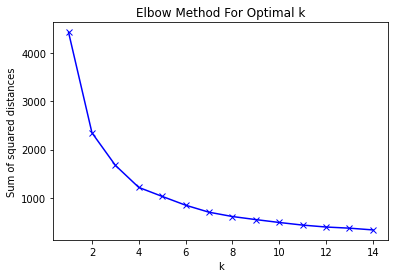

In [51]:
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Wednesday)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [52]:
kmeans_wednesday=KMeans(n_clusters=2, random_state=123)
kmeans_wednesday.fit(Wednesday)
pred_wednesday=kmeans_wednesday.predict(Wednesday)

In [53]:
df_mice['cluster_Wednesday']= pred_wednesday

In [54]:
df_Thursday=[df['TH1'],df['TH2'],df['TH3'],df_mice['TH4']]
df_Thursday=pd.DataFrame(df_Thursday)
df_Thursday=df_Thursday.T
df_Thursday

,TH1,TH2,TH3,TH4
0,6.0,4.0,6.0,7.0
1,4.0,6.0,6.0,7.0
2,6.0,5.0,7.0,5.0
3,4.0,4.0,4.0,7.0
4,5.0,6.0,7.0,7.0
...,...,...,...,...
995,5.0,3.0,6.0,7.0
996,5.0,4.0,2.0,6.0
997,2.0,5.0,5.0,5.0
998,2.0,2.0,7.0,4.0


In [55]:
from sklearn.decomposition import PCA

# Feature matrix and target array
X = df_Thursday

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.3900774  0.28295381]


In [56]:
Thursday=pd.DataFrame(principalComponents)
Thursday

,0,1
0,-1.156432,0.371395
1,-1.097460,0.423998
2,-0.402173,-1.646206
3,0.443099,2.182015
4,-1.897226,-0.481311
...,...,...
995,-0.531958,0.526587
996,1.823958,3.151098
997,1.851320,0.345906
998,2.560503,-1.659181


In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(Thursday)
    score = silhouette_score(Thursday, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.40824655962321815)
For n_clusters = 3, silhouette score is 0.4083802569299528)
For n_clusters = 4, silhouette score is 0.45339066781963605)
For n_clusters = 5, silhouette score is 0.449714706580961)
For n_clusters = 6, silhouette score is 0.46695257021710657)
For n_clusters = 7, silhouette score is 0.45880923431733084)
For n_clusters = 8, silhouette score is 0.42769852620392657)
For n_clusters = 9, silhouette score is 0.4060354744650266)


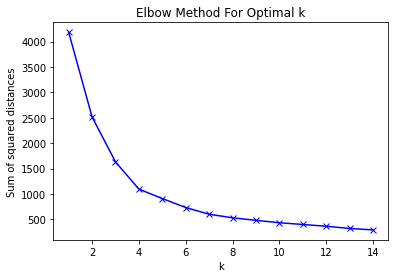

In [58]:
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Thursday)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [59]:
kmeans_thursday=KMeans(n_clusters=4, random_state=123)
kmeans_thursday.fit(Thursday)
pred_thursday=kmeans_thursday.predict(Thursday)

In [60]:
df_mice['cluster_Thursday']= pred_thursday

In [61]:
df_mice

,M4,T4,W4,TH4,F4,cluster_Monday,cluster_Tuesday,cluster_Wednesday,cluster_Thursday
0,4.000000,5.0,6.000000,7.0,7.000000,1,3,0,3
1,6.000000,6.0,7.000000,7.0,7.000000,1,3,0,3
2,2.000000,3.0,3.970287,5.0,6.000000,0,2,1,0
3,4.000000,5.0,6.000000,7.0,7.000000,1,1,0,1
4,4.032082,5.0,6.000000,7.0,7.412926,1,3,0,3
...,...,...,...,...,...,...,...,...,...
995,6.000000,6.0,6.000000,7.0,7.000000,1,3,0,1
996,5.000000,5.0,5.000000,6.0,7.000000,1,1,0,1
997,4.824218,5.0,5.000000,5.0,5.000000,1,3,0,2
998,3.000000,3.0,3.000000,4.0,5.000000,0,2,1,2


In [62]:
df_Friday=[df['F1'],df['F2'],df['F3'],df_mice['F4']]
df_Friday=pd.DataFrame(df_Friday)
df_Friday=df_Friday.T
df_Friday

,F1,F2,F3,F4
0,7.0,5.0,7.0,7.000000
1,5.0,7.0,7.0,7.000000
2,7.0,6.0,7.0,6.000000
3,5.0,5.0,5.0,7.000000
4,6.0,7.0,7.0,7.412926
...,...,...,...,...
995,5.0,3.0,6.0,7.000000
996,7.0,5.0,3.0,7.000000
997,3.0,5.0,5.0,5.000000
998,3.0,2.0,7.0,5.000000


In [63]:
from sklearn.decomposition import PCA

# Feature matrix and target array
X = df_Friday

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.47047558 0.19543723]


In [64]:
Friday=pd.DataFrame(principalComponents)
Friday

,0,1
0,-0.862328,-0.054194
1,-0.815458,-0.029952
2,-0.895260,0.777850
3,1.119411,-1.481248
4,-1.557990,-0.276304
...,...,...
995,1.707675,-0.987759
996,0.933144,-2.647242
997,3.174683,-0.102463
998,3.832645,0.961902


In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For loop
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(Friday)
    score = silhouette_score(Friday, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5561762783631714)
For n_clusters = 3, silhouette score is 0.4736195824824133)
For n_clusters = 4, silhouette score is 0.4064802799436574)
For n_clusters = 5, silhouette score is 0.41838734305787034)
For n_clusters = 6, silhouette score is 0.41406523927213246)
For n_clusters = 7, silhouette score is 0.425580926675167)
For n_clusters = 8, silhouette score is 0.4181951420035807)
For n_clusters = 9, silhouette score is 0.425363112446685)


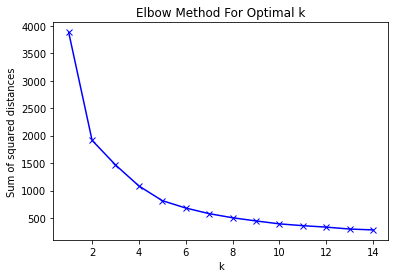

In [66]:
sum_of_squared_distances = []

# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Friday)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
kmeans_friday=KMeans(n_clusters=2, random_state=123)
kmeans_friday.fit(Friday)
pred_friday=kmeans_friday.predict(Friday)

In [68]:
df_mice['cluster_Friday']= pred_friday

In [69]:
df_mice

,M4,T4,W4,TH4,F4,cluster_Monday,cluster_Tuesday,cluster_Wednesday,cluster_Thursday,cluster_Friday
0,4.000000,5.0,6.000000,7.0,7.000000,1,3,0,3,1
1,6.000000,6.0,7.000000,7.0,7.000000,1,3,0,3,1
2,2.000000,3.0,3.970287,5.0,6.000000,0,2,1,0,1
3,4.000000,5.0,6.000000,7.0,7.000000,1,1,0,1,0
4,4.032082,5.0,6.000000,7.0,7.412926,1,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...
995,6.000000,6.0,6.000000,7.0,7.000000,1,3,0,1,0
996,5.000000,5.0,5.000000,6.0,7.000000,1,1,0,1,1
997,4.824218,5.0,5.000000,5.0,5.000000,1,3,0,2,0
998,3.000000,3.0,3.000000,4.0,5.000000,0,2,1,2,0


In [70]:
df_mice=df_mice.round(0)

In [71]:
df_mice

,M4,T4,W4,TH4,F4,cluster_Monday,cluster_Tuesday,cluster_Wednesday,cluster_Thursday,cluster_Friday
0,4.0,5.0,6.0,7.0,7.0,1,3,0,3,1
1,6.0,6.0,7.0,7.0,7.0,1,3,0,3,1
2,2.0,3.0,4.0,5.0,6.0,0,2,1,0,1
3,4.0,5.0,6.0,7.0,7.0,1,1,0,1,0
4,4.0,5.0,6.0,7.0,7.0,1,3,0,3,1
...,...,...,...,...,...,...,...,...,...,...
995,6.0,6.0,6.0,7.0,7.0,1,3,0,1,0
996,5.0,5.0,5.0,6.0,7.0,1,1,0,1,1
997,5.0,5.0,5.0,5.0,5.0,1,3,0,2,0
998,3.0,3.0,3.0,4.0,5.0,0,2,1,2,0


In [72]:
df_m=df_mice[['M4','cluster_Monday']]

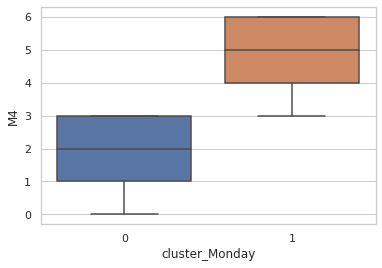

In [73]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.boxplot(x="cluster_Monday", y="M4", data=df_mice)

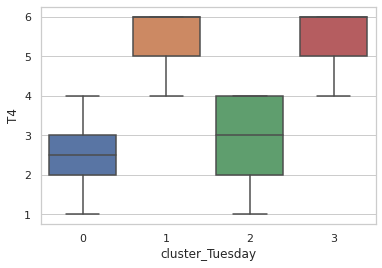

In [74]:
sns.boxplot(x="cluster_Tuesday", y="T4", data=df_mice)

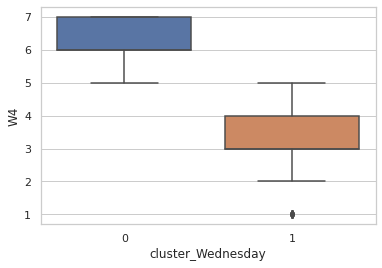

In [75]:
sns.boxplot(x="cluster_Wednesday", y="W4", data=df_mice)

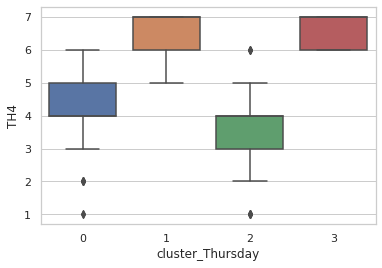

In [76]:
sns.boxplot(x="cluster_Thursday", y="TH4", data=df_mice)

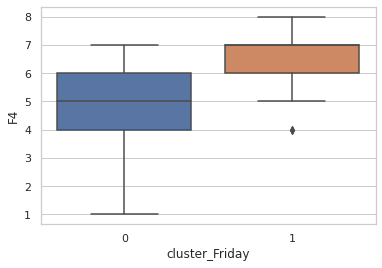

In [77]:
sns.boxplot(x="cluster_Friday", y="F4", data=df_mice)

In [136]:
from sklearn.ensemble import RandomForestRegressor


In [137]:
clf_m = RandomForestRegressor()
clf_t=RandomForestRegressor()
clf_w=RandomForestRegressor()
clf_th=RandomForestRegressor()
clf_f=RandomForestRegressor()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 0, Score: 0.00391
Feature: 1, Score: 0.98817
Feature: 2, Score: 0.00149
Feature: 3, Score: 0.00643


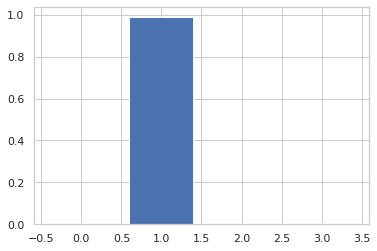

In [138]:
from matplotlib import pyplot
# fit the model
clf.fit(df_mice[['F4','T4','W4','TH4']], df_mice[['M4']])
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [139]:
clf_m.fit(df_mice[['T4','cluster_Monday']],df_mice[['M4']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [140]:
from sklearn.metrics import r2_score
r2_score(df_mice[['M4']],clf_m.predict(df_mice[['T4','cluster_Monday']]))

0.9559508075041929

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 0, Score: 0.72283
Feature: 1, Score: 0.00165
Feature: 2, Score: 0.27176
Feature: 3, Score: 0.00375


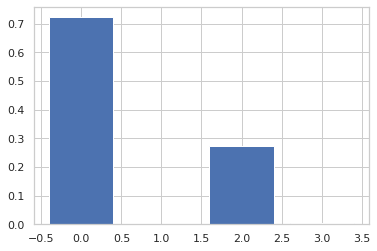

In [141]:
from matplotlib import pyplot
# fit the model
clf.fit(df_mice[['M4','F4','W4','TH4']], df_mice[['T4']])
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [142]:
clf_t.fit(df_mice[['M4','W4','cluster_Tuesday']],df_mice[['T4']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
from sklearn.metrics import r2_score
r2_score(df_mice[['T4']],clf_t.predict(df_mice[['M4','W4','cluster_Tuesday']]))

0.9911856363493854

In [144]:
clf_w.fit(df_mice[['T4','TH4','cluster_Wednesday']],df_mice[['W4']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [145]:
from sklearn.metrics import r2_score
r2_score(df_mice[['W4']],clf_w.predict(df_mice[['T4','TH4','cluster_Wednesday']]))

0.9889387753063791

In [146]:
clf_th.fit(df_mice[['W4','F4','cluster_Thursday']],df_mice[['TH4']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [147]:
from sklearn.metrics import r2_score
r2_score(df_mice[['TH4']],clf_th.predict(df_mice[['W4','F4','cluster_Thursday']]))

0.9889115321494469

In [148]:
clf_f.fit(df_mice[['TH4','cluster_Friday']],df_mice[['F4']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [149]:
from sklearn.metrics import r2_score
r2_score(df_mice[['F4']],clf_f.predict(df_mice[['TH4','cluster_Friday']]))

0.9580749493773475

In [151]:
M=clf_m.predict(df_mice[['T4','cluster_Monday']])
T=clf_t.predict(df_mice[['M4','W4','cluster_Tuesday']])
W=clf_w.predict(df_mice[['T4','TH4','cluster_Wednesday']])
TH=clf_th.predict(df_mice[['W4','F4','cluster_Thursday']])
F=clf_f.predict(df_mice[['TH4','cluster_Friday']])

In [152]:
a=[M,T,W,TH,F]
b=pd.DataFrame(a)
b_final=b.round(0)
c=b_final.T
c

,0,1,2,3,4
0,4.0,5.0,6.0,7.0,7.0
1,6.0,6.0,7.0,7.0,7.0
2,2.0,3.0,4.0,5.0,6.0
3,4.0,5.0,6.0,7.0,7.0
4,4.0,5.0,6.0,7.0,7.0
...,...,...,...,...,...
995,6.0,6.0,7.0,7.0,7.0
996,4.0,5.0,6.0,6.0,7.0
997,4.0,5.0,5.0,5.0,6.0
998,2.0,3.0,4.0,4.0,5.0


In [155]:
c.to_excel('Week5.xlsx')